In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
sim = QasmSimulator() # make new simulator object

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


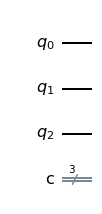

In [2]:
# Create quantum circuit with 3 qubits and 3 classical bits
# (we'll explain why we need the classical bits later)
qc = QuantumCircuit(3, 3)
qc.draw()  # returns a drawing of the circuit

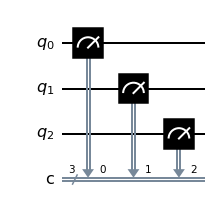

In [3]:
qc = QuantumCircuit(3, 3)
# measure qubits 0, 1 & 2 to classical bits 0, 1 & 2 respectively
qc.measure([0,1,2], [0,1,2])
qc.draw()

In [4]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'000': 1024}

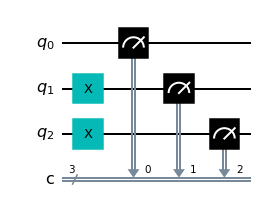

In [5]:
# Create quantum circuit with 3 qubits and 3 classical bits:
qc = QuantumCircuit(3, 3)
qc.x([1,2])  # Perform X-gates on qubits 0 & 1
qc.measure([0,1,2], [0,1,2])
qc.draw()    # returns a drawing of the circuit

In [6]:
job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
result.get_counts()    # interpret the results as a "counts" dictionary

{'110': 1024}

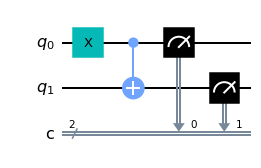

Result:  {'11': 1024}


In [7]:
# Create quantum circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)  # CNOT controlled by qubit 0 and targeting qubit 1
qc.measure([0,1], [0,1])
display(qc.draw())     # display a drawing of the circuit

job = sim.run(qc)      # run the experiment
result = job.result()  # get the results
# interpret the results as a "counts" dictionary
print("Result: ", result.get_counts())

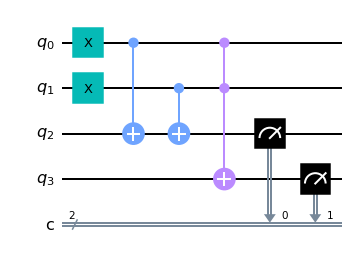

In [8]:
#half adder using NOT, CNOT and Toffoli gates

qc = QuantumCircuit(4,2)
qc.x(0)
qc.x(1)
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3)
qc.measure([2,3], [0,1])
display(qc.draw())

In [9]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()   

{'10': 1024}

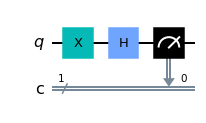

In [10]:
#half adder using NOT< CNOT and Toffoli gates

qc = QuantumCircuit(1,1)
qc.x(0)
#qc.h(0)
qc.h(0)
qc.measure([0], [0])
display(qc.draw())

In [11]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()   

{'0': 495, '1': 529}

In [12]:
from qiskit.quantum_info import Statevector

qc = QuantumCircuit(2)

# This calculates what the state vector of our qubits would be
# after passing through the circuit 'qc'
ket = Statevector(qc)

# The code below writes down the state vector.
# Since it's the last line in the cell, the cell will display it as output
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [13]:
ket.measure()

('00',
 Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
             dims=(2, 2)))

In [14]:
ket.probabilities()

array([1., 0., 0., 0.])

In [15]:
qc.cx(0,1)

ket = Statevector(qc)
ket.draw()

'Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],\n            dims=(2, 2))'

In [16]:
qc.x(1)
qc.cx(1,0)

ket = Statevector(qc)
ket.measure()

('11',
 Statevector([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
             dims=(2, 2)))

In [17]:
# Let's create a fresh quantum circuit
qc = QuantumCircuit(2)

qc.h(1)

ket = Statevector(qc)
ket.measure()

('00',
 Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
             dims=(2, 2)))

In [18]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [19]:
qc.z(0)

ket = Statevector(qc)
ket.draw()

'Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,\n             -0.70710678+0.j],\n            dims=(2, 2))'

In [20]:
qc.cx(1,0)

ket = Statevector(qc)
ket.draw()

'Statevector([ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,\n              0.        +0.j],\n            dims=(2, 2))'

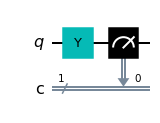

In [21]:
qc = QuantumCircuit(1,1)
#qc.x(0)
#qc.h(0)
qc.y(0)
qc.measure([0], [0])
display(qc.draw())

In [22]:
job = sim.run(qc)  # run the experiment
result = job.result()   # get the results
result.get_counts()   

{'1': 1024}